In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [3]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2467,47083,8263,922,11.158175,1049,12.695147,938,11.351809,912,11.037154,...,829,14.9,13.8,16.0,964,3.7,3.4,4.0,241,6
1645,30099,6162,834,13.534567,793,12.869198,594,9.639727,665,10.791951,...,370,11.5,10.5,12.6,538,3.5,3.2,3.8,163,6
2987,53073,225685,24496,10.854067,27050,11.985732,40511,17.950240,28415,12.590558,...,11009,9.3,8.6,10.1,16961,2.8,2.6,3.0,5054,4
315,10003,559335,65275,11.670108,71317,12.750320,77609,13.875227,75954,13.579340,...,28308,11.2,10.4,11.9,49031,2.9,2.8,3.1,12823,2
1762,33001,61022,5726,9.383501,6663,10.919013,6378,10.451968,6592,10.802661,...,4334,11.3,10.1,12.5,5626,3.0,2.8,3.3,1508,5
462,13157,70422,9624,13.666184,9762,13.862145,8411,11.943711,9629,13.673284,...,4249,11.1,10.3,12.0,5853,2.9,2.7,3.1,1527,5
1888,37001,166436,19782,11.885650,23595,14.176620,21654,13.010406,19533,11.736043,...,11140,12.9,12.0,13.7,16631,3.4,3.2,3.6,4401,4
355,12077,8457,772,9.128533,897,10.606598,1334,15.773915,1314,15.537425,...,754,13.1,12.3,13.9,908,3.3,3.1,3.6,231,6
2382,46047,6758,588,8.700799,705,10.432080,591,8.745191,562,8.316070,...,440,13.8,12.7,15.0,774,3.9,3.7,4.3,220,6
2444,47037,692587,85718,12.376496,76313,11.018544,124180,17.929877,118924,17.170984,...,38870,10.6,9.9,11.4,58228,2.8,2.6,2.9,15193,1


In [4]:
df_raw.to_csv('../data/raw/data_raw.csv')

In [39]:
df_processed = df_raw.copy()

In [40]:
list = df_processed.columns.to_list()

list[40:]

['R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'Percent of adults with less than a high school diploma 2014-18',
 'Percent of adults with a high school diploma only 2014-18',
 "Percent of adults completing some college or associate's degree 2014-18",
 "Percent of adults with a bachelor's degree or higher 2014-18",
 'POVALL_2018',
 'PCTPOVALL_2018',
 'PCTPOV017_2018',
 'PCTPOV517_2018',
 'MEDHHINC_2018',
 'CI90LBINC_2018',
 'CI90UBINC_2018',
 'Civilian_labor_force_2018',
 'Employed_2018',
 'Unemployed_2018',
 'Unemployment_rate_2018',
 'Median_Household_Income_2018',
 'Med_HH_Income_Percent_of_State_Total_2018',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Patient Care Primary Care Physi

In [136]:
#Variable/feature (independant variables) Selection

df_interin = df_processed[["0-9","19-Oct","20-29","30-39","40-49","50-59","60-69","70-79","80+","% White-alone","% Black-alone","% NA/AI-alone","% Asian-alone","% Hawaiian/PI-alone","Less than a high school diploma 2014-18","High school diploma only 2014-18","Bachelor's degree or higher 2014-18","MEDHHINC_2018","Employed_2018","Unemployed_2018","Active Physicians per 100000 Population 2018 (AAMC)","Obesity_prevalence","diabetes_prevalence","CKD_prevalence","COPD_prevalence","POVALL_2018","Heart disease_prevalence"]]

In [137]:
df_interin.describe().T

,count,mean,std,min,25%,50%,75%,max
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
19-Oct,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
40-49,3140.0,12885.214331,43472.189993,4.000000,1245.250000,3048.500000,8120.500000,1.350076e+06
50-59,3140.0,13638.031529,42720.629434,14.000000,1483.000000,3515.500000,9157.250000,1.306003e+06
60-69,3140.0,11916.213057,34518.581878,20.000000,1476.500000,3410.000000,8710.500000,1.014325e+06
70-79,3140.0,7220.310510,20287.498429,6.000000,950.750000,2177.000000,5574.000000,5.725300e+05
80+,3140.0,4035.541720,12063.782251,0.000000,533.000000,1160.000000,2899.750000,3.562750e+05
% White-alone,3140.0,84.494109,16.348987,3.841985,79.620473,91.410189,95.521727,9.904378e+01


In [138]:
X = df_interin.drop(["Heart disease_prevalence"], axis= 1)
y = df_interin["Heart disease_prevalence"] #vairables objetivo con minúscula

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2115) #test_size: Cantidad de datos que usará para testing. 2115: seed para el random

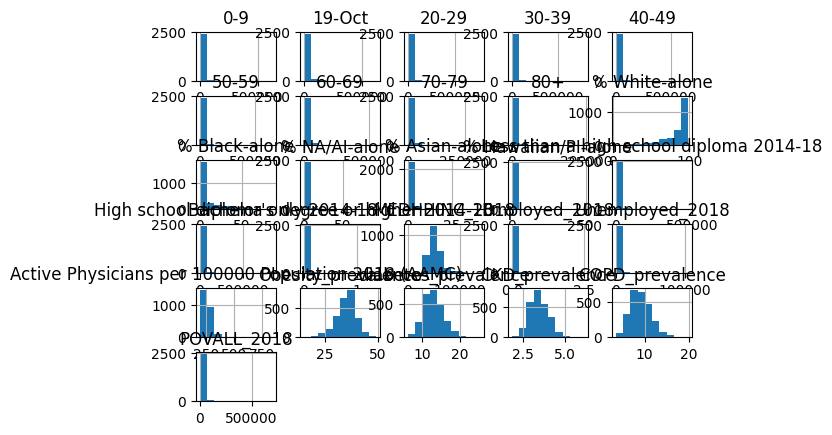

In [146]:
X_train.hist() #Si las distribuciones son como campana se usa std scaler
plt.show()

In [148]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
#Cross validation hace varios cortes del data set, y va tomando

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2119)

In [141]:
model = LassoCV(alphas=np.arange(0,1,0.05),cv=cv,n_jobs=-1)


In [149]:
model.fit(X_train_scaled,y_train)

/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.87585537301766, tolerance: 0.6748211079646016
  model = cd_fast.enet_coordinate_descent_gram(
/

LassoCV(alphas=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=2119),
        n_jobs=-1)

In [150]:
model.alpha_

0.0

In [151]:
y_hat = model.predict(X_test_scaled)

In [153]:
print(f'MSE: {mean_squared_error(y_hat,y_test)}')
print(f'R2: {r2_score(y_test,y_hat)}')

MSE: 0.21366368146907594
R2: 0.9367251652212428
